In [4]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

2025-02-12 20:18:38.757840: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
picture_size = 48
folder_path = "./images/"

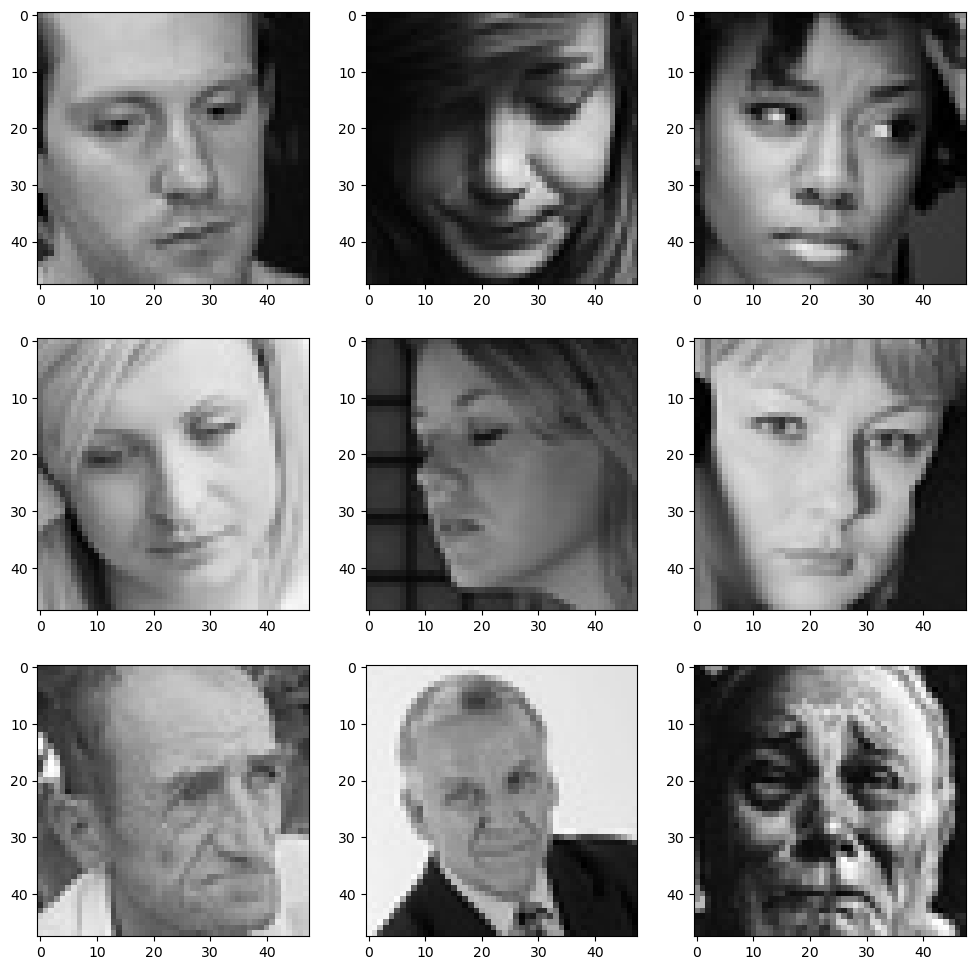

In [5]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [7]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        folder_path+"train",
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        folder_path+"test",
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [8]:
print(len(train_generator))
print(len(validation_generator))

451
111


In [11]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

emotion_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28821 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7066 // 64)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 449s 982ms/step - accuracy: 0.2428 - loss: 1.8284 - val_accuracy: 0.3614 - val_loss: 1.6866
Epoch 2/50
  1/450 ━━━━━━━━━━━━━━━━━━━━ 7:03 944ms/step - accuracy: 0.3281 - loss: 1.7360

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.3281 - loss: 1.7360 - val_accuracy: 0.3658 - val_loss: 1.6826
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 373s 828ms/step - accuracy: 0.3498 - loss: 1.6512 - val_accuracy: 0.4074 - val_loss: 1.5372
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.4219 - loss: 1.6012 - val_accuracy: 0.4064 - val_loss: 1.5383
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 364s 809ms/step - accuracy: 0.4144 - loss: 1.5358 - val_accuracy: 0.4496 - val_loss: 1.4559
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.4062 - loss: 1.4675 - val_accuracy: 0.4490 - val_loss: 1.4536
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 338s 751ms/step - accuracy: 0.4402 - loss: 1.4625 - val_accuracy: 0.4713 - val_loss: 1.3883
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 39s 85ms/step - accuracy: 0.5469 - loss: 1.2920 - val_accuracy: 0.4716 - val_loss: 1.3885
Epoch 9/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 351s 781ms/step - accuracy: 0.4644 - loss: 1.3988 - val

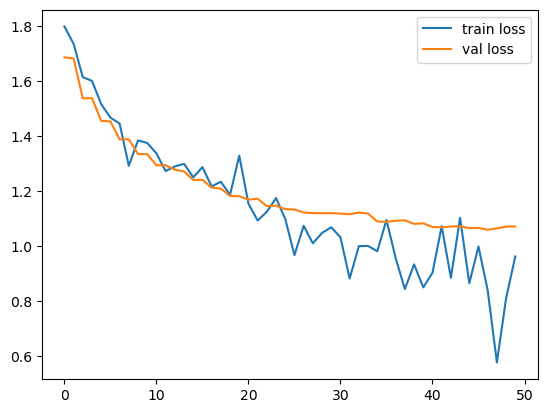

In [18]:
# loss
plt.plot(emotion_model_info.history['loss'], label='train loss')
plt.plot(emotion_model_info.history['val_loss'], label='val loss')
plt.legend()
plt.show()

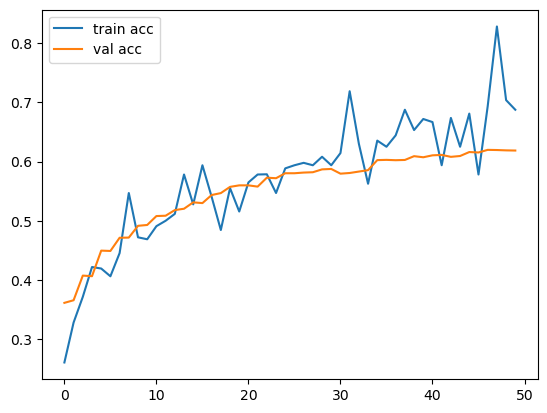

In [19]:
# accuracies
plt.plot(emotion_model_info.history['accuracy'], label='train acc')
plt.plot(emotion_model_info.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [21]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("face_emotion.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .weights.h5 file
emotion_model.save_weights('face_emotion.weights.h5')

In [22]:
lab = train_generator.class_indices
lab={k:v for v,k in lab.items()}
print(lab)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [24]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('./face_emotion.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("./face_emotion.weights.h5")

In [33]:
def predict_emotion(image_path):
    # Load the image
    img = load_img(image_path, target_size=(48, 48), color_mode='grayscale')

    # Display the loaded image
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Convert the image to a numpy array
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the pixel values
    img_array /= 255.0

    # Make predictions using the loaded model
    emotion_prediction = emotion_model.predict(img_array)

    # Get the predicted emotion label
    emotion_labels = ['Angry','disgust','Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
    predicted_emotion_index = np.argmax(emotion_prediction)
    predicted_emotion_label = emotion_labels[predicted_emotion_index]

    # Display the predicted emotion
    print(f"Predicted Emotion: {predicted_emotion_label}")


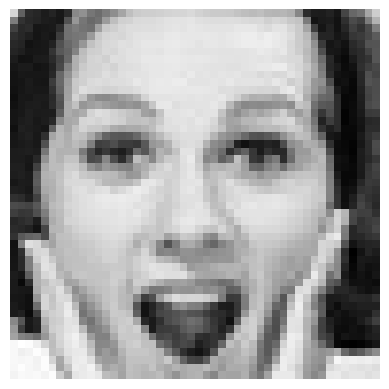

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Emotion: Surprise


In [34]:
# Call the function with the path to your image
image_path = './images/train/surprise/10011.jpg'
predict_emotion(image_path)

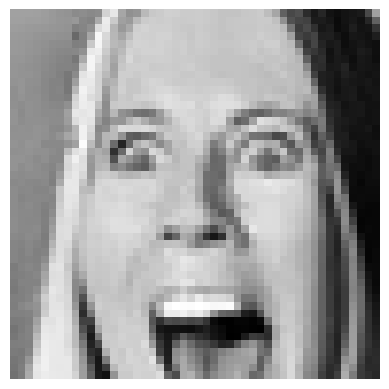

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Emotion: Fear


In [35]:
# Call the function with the path to your image
image_path = './images/train/fear/10047.jpg'
predict_emotion(image_path)